In [108]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression

In [40]:
df= pd.read_csv("titanic survival.csv")
df.head(10)

#df = sns.load_dataset('titanic survival')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [41]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [42]:
#to understand the data
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

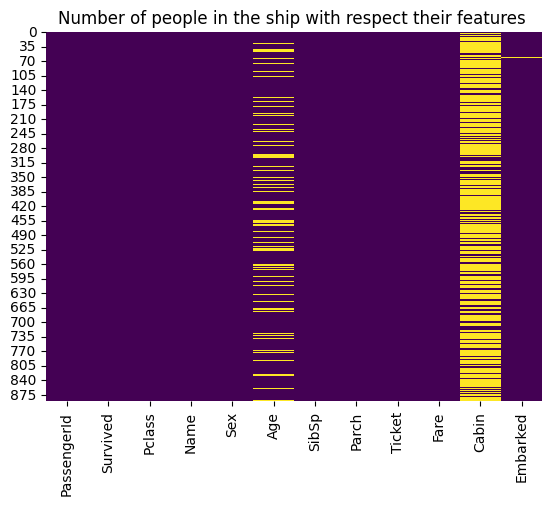

In [43]:
sns.heatmap(df.isnull(), cbar = False, cmap = 'viridis')
plt.title('Number of people in the ship with respect their features ')
plt.show()

In [44]:
df['Age'].isnull().sum()/df.shape[0]*100

19.865319865319865

In [45]:
df['Cabin'].isnull().sum()/df.shape[0]*100

77.10437710437711

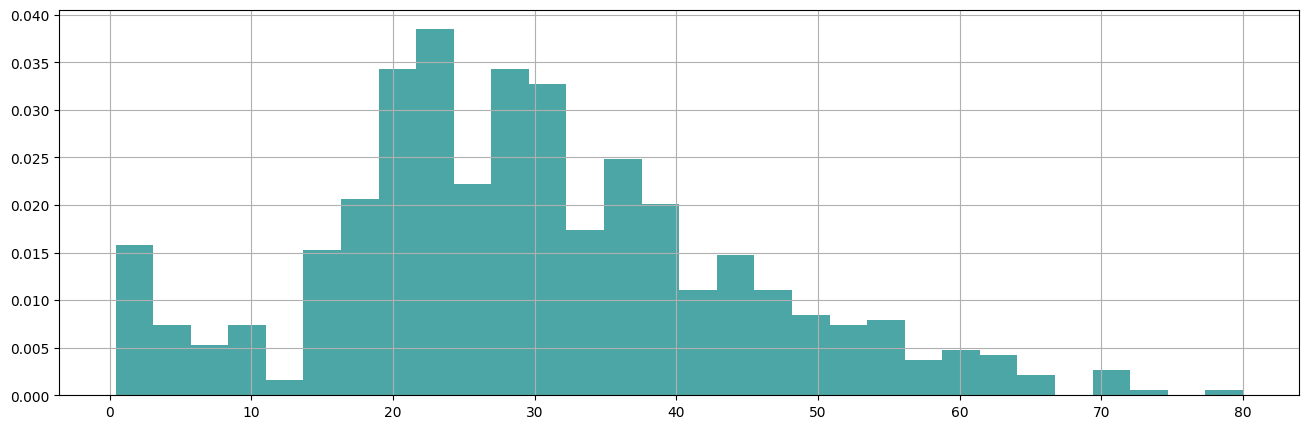

In [46]:
#histogram

ax = df['Age'].hist(bins = 30, density = True, stacked = True, color = 'teal', alpha = 0.7, figsize = (16, 5))


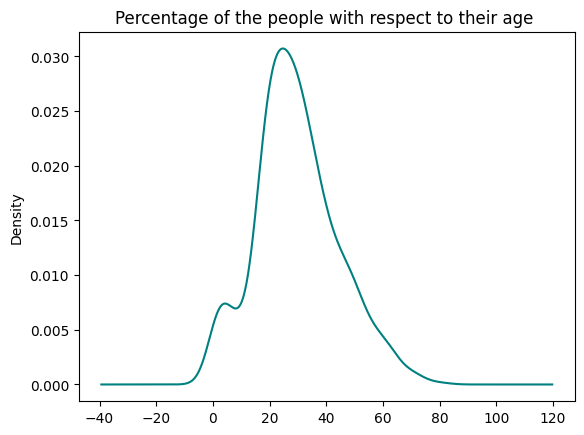

In [47]:
df['Age'].plot(kind = 'density', color = 'teal')
ax.set_xlabel('Age')
plt.title('Percentage of the people with respect to their age ')
plt.show()

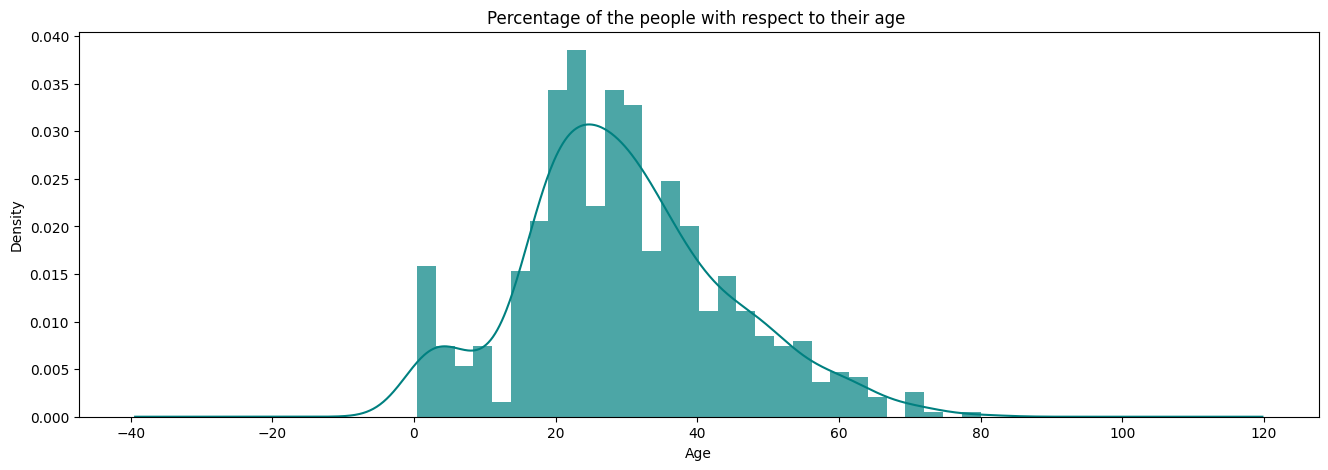

In [48]:
ax = df['Age'].hist(bins = 30, density = True, stacked = True, color = 'teal', alpha = 0.7, figsize = (16, 5))
df['Age'].plot(kind = 'density', color = 'teal')
ax.set_xlabel('Age')
plt.title('Percentage of the people with respect to their age ')
plt.show()

/tmp/ipykernel_9304/3860330730.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(women[women[s]==1].Age.dropna(), bins = 18, label = s, ax = axes[0], kde = False)
/tmp/ipykernel_9304/3860330730.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(women[women[s]==0].Age.dropna(), bins

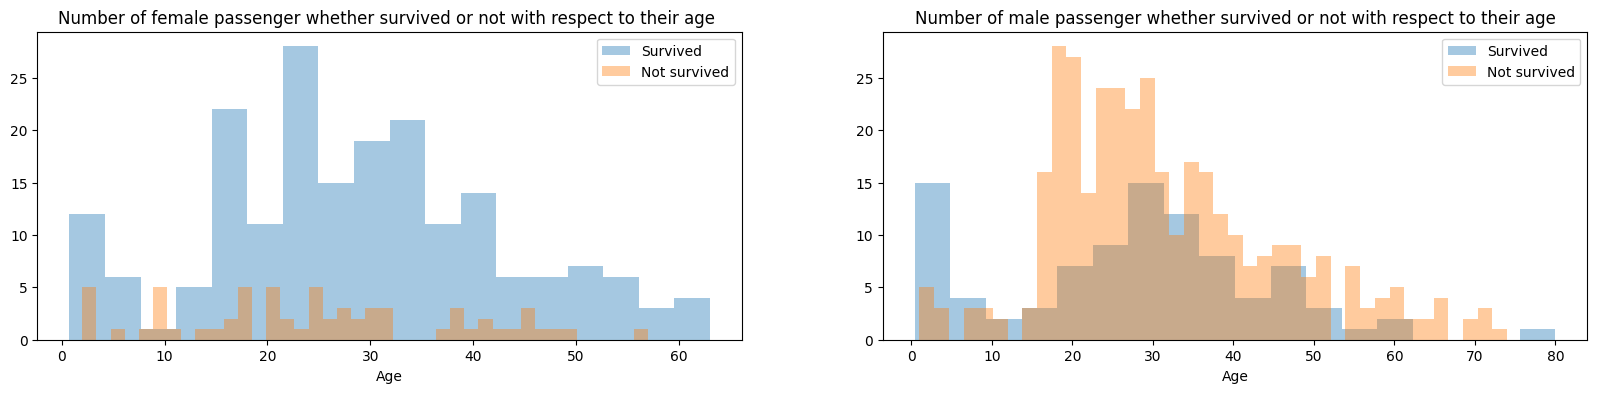

In [49]:
s= 'Survived'
n_s = 'Not survived'

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 4))
women = df[df['Sex'] == 'female']
men = df[df['Sex'] == 'male']
                         

ax = sns.distplot(women[women[s]==1].Age.dropna(), bins = 18, label = s, ax = axes[0], kde = False)
ax = sns.distplot(women[women[s]==0].Age.dropna(), bins = 40, label = n_s, ax = axes[0], kde = False)
ax.legend()
ax.set_title('Number of female passenger whether survived or not with respect to their age ')
ax = sns.distplot(men[men[s]==1].Age.dropna(), bins = 18, label = s, ax = axes[1], kde = False)
ax = sns.distplot(men[men[s]==0].Age.dropna(), bins = 40, label = n_s, ax = axes[1], kde = False)
ax.legend()
ax.set_title('Number of male passenger whether survived or not with respect to their age')
#plt.ylabel('No. of people')
plt.show()

In [50]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

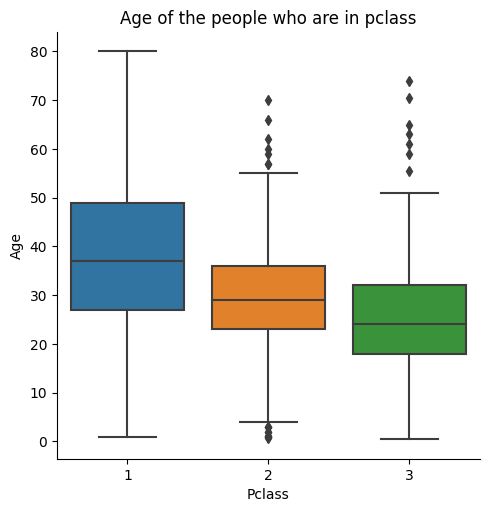

In [51]:
#the people with respect to their age who are in pclass
sns.catplot(x = 'Pclass', y = 'Age', data = df, kind = 'box')
plt.title('Age of the people who are in pclass')
plt.show()

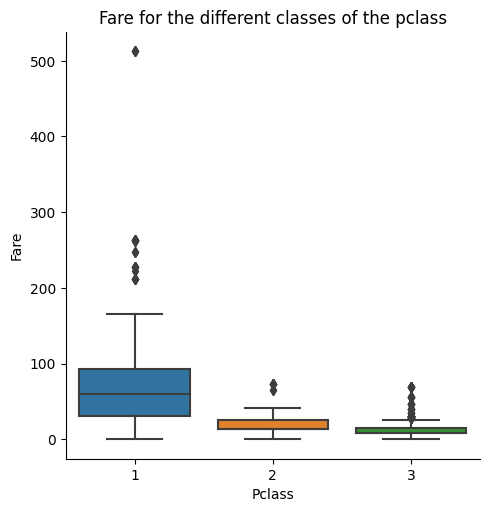

In [52]:
sns.catplot(x = 'Pclass', y = 'Fare', data = df, kind = 'box')
plt.title('Fare for the different classes of the pclass')
plt.show()

In [53]:
df[df['Pclass'] == 1]['Age'].mean()

38.233440860215055

In [54]:
df[df['Pclass'] == 2]['Age'].mean()


29.87763005780347

In [55]:
df[df['Pclass'] == 3]['Age'].mean()

25.14061971830986

In [56]:
#dealing with missing values
#method-imputation
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return df[df['Pclass'] == 1]['Age'].mean()
        elif Pclass == 2:
            return df[df['Pclass'] == 2]['Age'].mean()
        elif Pclass == 3:
            return df[df['Pclass'] == 3]['Age'].mean()
        
    else:
        return Age

In [57]:
df['Age'] = df[['Age', 'Pclass']].apply(impute_age, axis = 1)

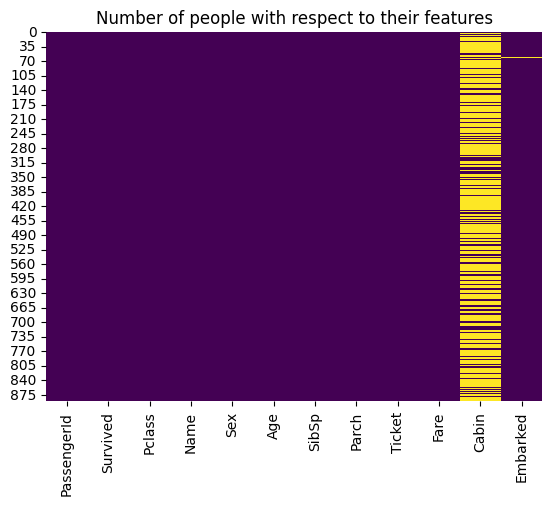

In [58]:
#the changes in the plot
sns.heatmap(df.isnull(), cbar = False, cmap = 'viridis')
plt.title('Number of people with respect to their features')
plt.show()

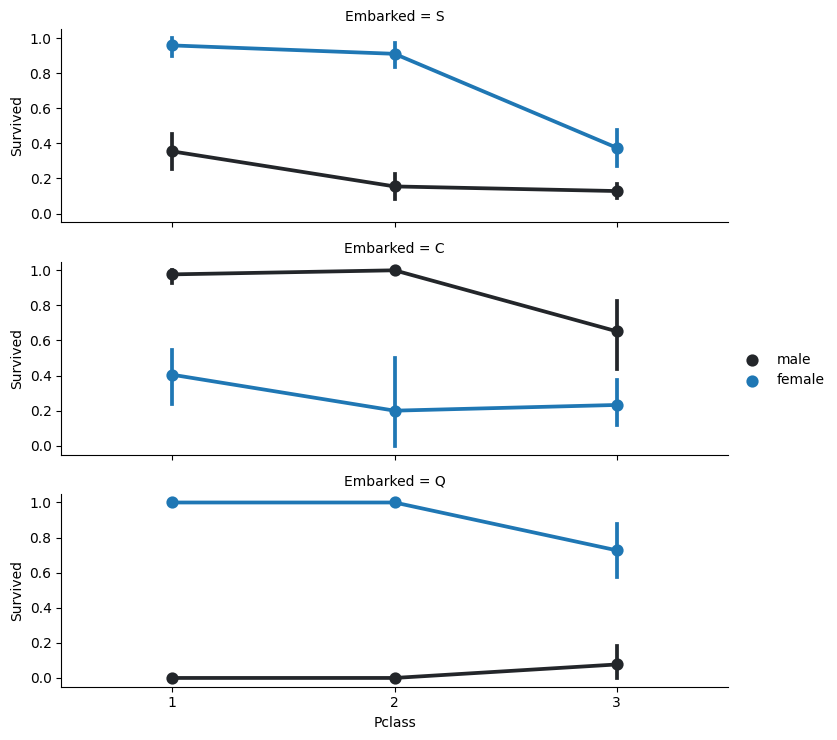

In [59]:
#to fill in embarked column
#analyzing no of passengers get into the ship.
#method - facegrid: Multi-plot grid for plotting conditional relationships.

f = sns.FacetGrid(df, row = 'Embarked', height = 2.5, aspect= 3)
f.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', order = None, hue_order = None)
f.add_legend()
plt.show()

In [60]:
df['Embarked'].isnull().sum()

2

In [61]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [62]:
most_common = 'S'
df['Embarked'].fillna(most_common, inplace = True) 

In [63]:
df['Embarked'].isnull().sum()

0

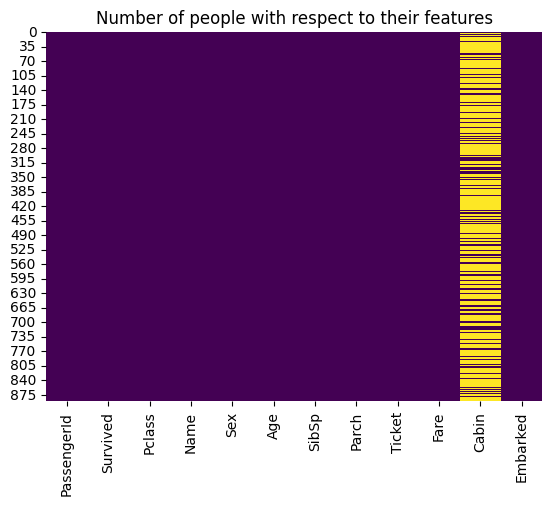

In [64]:
sns.heatmap(df.isnull(), cbar = False, cmap = 'viridis')
plt.title('Number of people with respect to their features')
plt.show()

In [65]:
#to get a heatmap w/o cabin
df.drop(labels=['Cabin'], inplace = True, axis = 1)

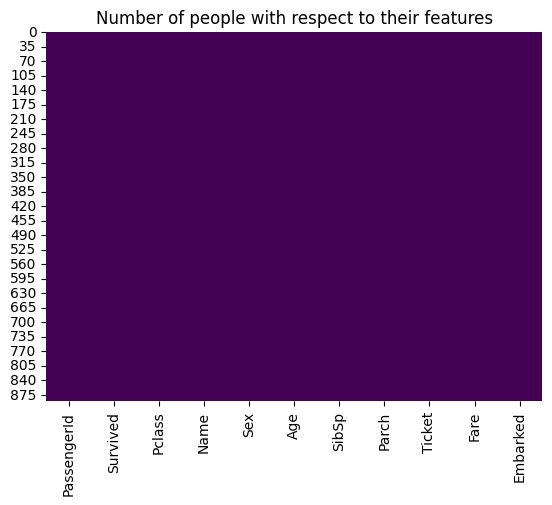

In [66]:
sns.heatmap(df.isnull(), cbar = False, cmap = 'viridis')
plt.title('Number of people with respect to their features')
plt.show()

In [67]:
#new data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [68]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [69]:
#feature transformation-converting diff data types to int
df['Fare'] = df['Fare'].astype('int')
df['Age'] = df['Age'].astype('int')
df['Pclass'] = df['Pclass'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    int64 
 1   Survived     891 non-null    int64 
 2   Pclass       891 non-null    int64 
 3   Name         891 non-null    object
 4   Sex          891 non-null    object
 5   Age          891 non-null    int64 
 6   SibSp        891 non-null    int64 
 7   Parch        891 non-null    int64 
 8   Ticket       891 non-null    object
 9   Fare         891 non-null    int64 
 10  Embarked     891 non-null    object
dtypes: int64(7), object(4)
memory usage: 76.7+ KB


In [70]:
#categorical data into numerical data

gender = {'male': 0, 'female': 1}
df['Sex'] = df['Sex'].map(gender)

ports = {'S': 0, 'C': 1, 'Q': 2}
df['Embarked'] = df['Embarked'].map(ports)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53,0
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8,0


In [71]:
df.drop(labels = ['Name','Ticket'], axis = 1, inplace= True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22,1,0,7,0
1,2,1,1,1,38,1,0,71,1
2,3,1,3,1,26,0,0,7,0
3,4,1,1,1,35,1,0,53,0
4,5,0,3,0,35,0,0,8,0


In [72]:
#logistic regression model

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [73]:
X = df.drop('Survived', axis = 1)
y = df['Survived']
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size = 0.33,random_state = 42)                            
X_train.shape

(596, 8)

In [74]:
model = LogisticRegression(solver= 'lbfgs', max_iter = 400)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model.score(X_test, y_test)

0.8203389830508474

In [75]:
#grouping mechanism
#here age and fare grouping


In [90]:
#Recursive Feature Elimination :
#from sklearn.feature_selection import RFE

In [103]:
#model = LogisticRegression(solver='lbfgs', max_iter=500)
#rfe = RFE(model,5,verbose=1)
#rfe = rfe.fit(X, y)
#rfe.support_

In [92]:
#Accuracy -tells the fraction of predictions the model got right .

In [93]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, auc, log_loss

In [94]:
model = LogisticRegression(solver= 'lbfgs', max_iter = 500)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [95]:
#predict_proba function
y_predict_prob = model.predict_proba(X_test)[:, 1]
y_predict_prob[: 5]

array([0.11841414, 0.22327939, 0.14519219, 0.88477152, 0.671291  ])

In [96]:
#roc curve
[fpr, tpr, thr] = roc_curve(y_test, y_predict_prob)
[fpr, tpr, thr][: 2]

[array([0.        , 0.        , 0.        , 0.00571429, 0.00571429,
        0.01142857, 0.01142857, 0.01714286, 0.01714286, 0.02285714,
        0.02285714, 0.02857143, 0.02857143, 0.03428571, 0.03428571,
        0.04571429, 0.04571429, 0.05142857, 0.05142857, 0.05714286,
        0.05714286, 0.06857143, 0.06857143, 0.08571429, 0.08571429,
        0.09714286, 0.09714286, 0.10285714, 0.10285714, 0.10857143,
        0.10857143, 0.12      , 0.12      , 0.13142857, 0.13142857,
        0.13714286, 0.13714286, 0.14285714, 0.14285714, 0.16      ,
        0.16      , 0.16571429, 0.16571429, 0.17714286, 0.17714286,
        0.18285714, 0.18285714, 0.18857143, 0.18857143, 0.21142857,
        0.21142857, 0.21714286, 0.21714286, 0.24571429, 0.24571429,
        0.25142857, 0.25142857, 0.25714286, 0.25714286, 0.26857143,
        0.26857143, 0.28      , 0.28      , 0.31428571, 0.31428571,
        0.44      , 0.44      , 0.45714286, 0.45714286, 0.47428571,
        0.47428571, 0.56571429, 0.56571429, 0.72

In [97]:
#predicting accuracy score ,log loss and area under the curve

In [98]:
print('Accuracy: ', accuracy_score(y_test, y_predict))
print('log loss: ', log_loss(y_test, y_predict_prob))
print('auc: ', auc(fpr, tpr))

Accuracy:  0.8203389830508474
log loss:  0.4136229601656514
auc:  0.8847142857142857


In [106]:
idx = np.min(np.where(tpr>0.95))
idx

76

/tmp/ipykernel_9304/3539239459.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, fpr[idx]], [tpr[idx], tpr[idx]], 'k--', color = 'blue')


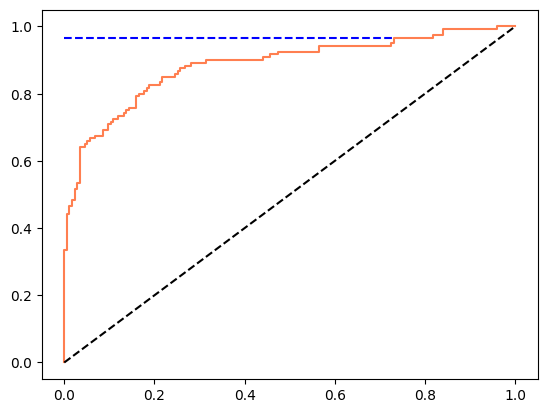

In [107]:
plt.figure()
plt.plot(fpr, tpr, color = 'coral', label = "ROC curve area: " + str(auc(fpr, tpr)))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, fpr[idx]], [tpr[idx], tpr[idx]], 'k--', color = 'blue')

/tmp/ipykernel_9304/3449932866.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, fpr[idx]], [tpr[idx], tpr[idx]], 'k--', color = 'blue')
/tmp/ipykernel_9304/3449932866.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')


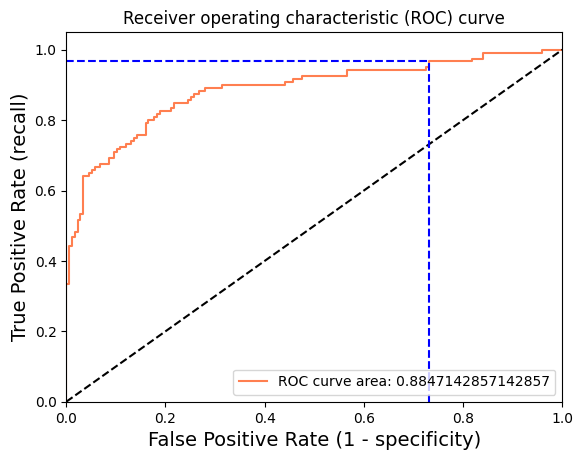

Using a threshold of 0.118 guarantees a sensitivity of 0.967 and a specificity of 0.269, i.e. a false positive rate of 73.14%.


In [101]:
#roc curve-Receiver Operating Characteristics
plt.figure()
plt.plot(fpr, tpr, color = 'coral', label = "ROC curve area: " + str(auc(fpr, tpr)))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, fpr[idx]], [tpr[idx], tpr[idx]], 'k--', color = 'blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))